In [473]:
#Import package

import pandas as pd
import numpy as np

from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
#Import SVM
from sklearn.svm import SVC
from IPython.display import display

In [669]:
#Own function
def scaling_features(x):
    return((x-min(x))/(max(x)-min(x)))

In [671]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0],  'o' ,marker='.',markersize = 15)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1],  'o' ,marker='s',markersize = 6)
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

In [369]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    
    '''
    Function qui permet de recupérer la constante et le coefficient directeur
    d'un svm après entraintement.
    
    Un svm lineaire est de la forme w0*w0+w1*x1 +b =0
    donc 
    >= x1= -w0/w1 *x0 -b/w1
    
    avoir x1 en fonction de x0 permet de tracer la zone de décision du SVM 
    et ainsi avoir une réprésentation graphique
    
    Pour calculer les marges on rajoute +- 1/w[1]
    
    
    '''
    
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [288]:
data = load_iris()

In [289]:
iris = pd.DataFrame(np.c_[data['data'],
                          data['target']
                         ],
                    columns = data.feature_names + ['species']
                   )

iris['species'] = iris['species'].astype('int')

Le jeu de données Iris est un jeu de données regroupant 3 espèces de plantes :

- La Setosa
- La Versicolore
- La Virginica

Pour chaque plante nous avons mesuré en cm 4 caractéristiques.
La longueur de ses pétales et sépales (visible sous la photo ci-dessous) ainsi que leur largeur.

## Iris flower
![iris_photo](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

On affiche le jeu de données Iris pour voir comment les informations sont représentées.

Les 3 espéces ont été recodées de la manière suivantes :

**0 = setos**

**1 = versicolor** 

**2 = virginica**

On compte 50 lignes par espèces pour un jeu de données au format (150,5)


In [311]:
iris.head() 



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0.5, 1.0, 'Scatter plot iris species : Petal length VS petal width')

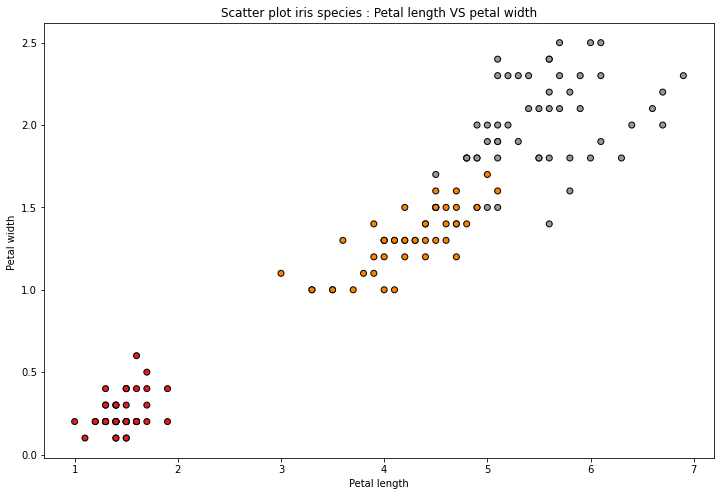

In [312]:
# Vizualize Data
plt.figure(figsize=(12, 8))

plt.scatter(iris['petal length (cm)'] ,iris['petal width (cm)'], c=iris.species, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Petal length")
plt.ylabel("Petal width ")
plt.title('Scatter plot iris species : Petal length VS petal width')

## Presentation intuitive d'un SVM

Prenons un exemple de classification binaire avec le data set Iris.
Pour faire simple nous utiliserons seulement 2 features

La longueur du petal et la largueur du petal 


$$
f(x) = X^T\beta = x1\beta1 + x2\beta2 + ... + \beta0 =0
$$

$$
f(x)>0 : classe: 1
$$
$$f(x)<0 : classe:0
$$

Text(0.5, 1.0, 'Scatter plot iris species : Petal length VS petal width')

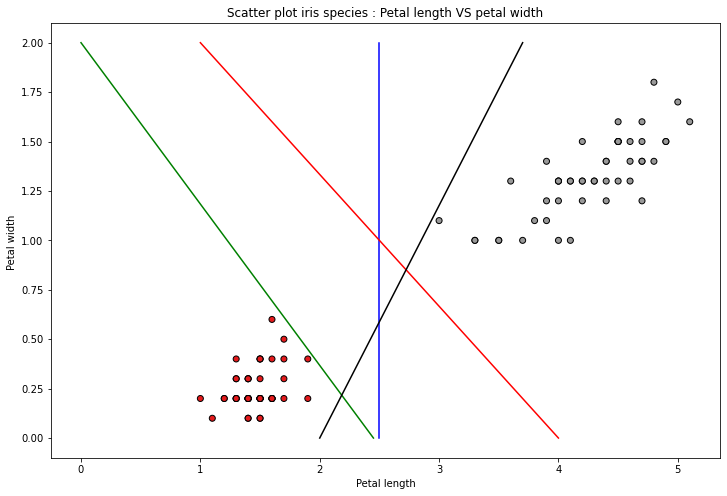

In [314]:
# Binary classification

binari_iris = iris[iris.species!=2]

plt.figure(figsize=(12, 8))

plt.scatter(binari_iris['petal length (cm)'] ,binari_iris['petal width (cm)'], c=binari_iris.species, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Petal length")
plt.ylabel("Petal width ")
plt.plot([0,2.45],[2,0], color = 'g')
plt.plot([2.5,2.5],[2,0], color = 'b')
plt.plot([1,4],[2.0,0], color = 'r')
plt.plot([3.7,2],[2.0,0], color = 'k')
plt.title('Scatter plot iris species : Petal length VS petal width')



Il existe une infinité de solutions pour choisir notre frontière de décision.
Afin de trouver une solution optimale il faut définir une fonction objective à optimiser!



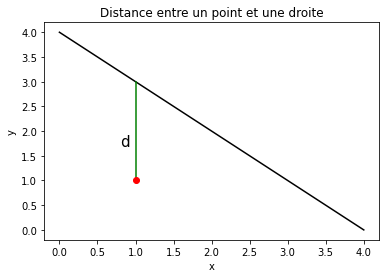

In [449]:
#Rappel maths
plt.plot([0,4],[4,0],  color='k')
plt.plot([1,1],[1,3],  color='g')
plt.plot([1],[1],'o' , color='red')
plt.text(0.8, 1.7, "d", fontsize=15, color="k")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distance entre un point et une droite')

plt.show()


Pour rappel la distance entre un point et une droite se calcule de la manière suivante pour un espace à 2 dimensions


$$
d = \frac{\vert{ax+by+c}\vert}{\sqrt{a²+b²}}
$$

On peut généraliser ce calcul de distance pour trouver les marges du SVM.

On va chercher le ou les points qui permettent de maximiser l'écart entre la marge et la frontière de décision (hyperplan) tout en minimisant l'écart entre la marge à un des poinits d'entraînement

Si on le formalise cela donne la formule suivante:


#### Calcul de la marge

$$
\frac{l_k(\omega^T\beta+b)}{\vert\vert\omega\vert\vert_2} 
$$
$$
$$
$$
$$
$$
\vert\vert\omega\vert\vert_2 : \sqrt{\omega_1²+\omega_2²+\omega_3²+...+\omega_n²}
$$

Où $\vert\vert\omega\vert\vert_2$ designe la norme euclidienne de $\omega$ et $l_k$ le label associé à chaque $x_k$.
<br>
La marge d’un hyperplan de paramètres $(\omega,b)$ par rapport à un ensemble de points $x_k$ est donc 


$$min(k)\frac{l_k(\omega^T\beta+b)}{\vert\vert\omega\vert\vert_2} $$


Pour rappel, la marge est la distance minimale de l’hyperplan à un des points d’entraînement.


#### Maximisation de la marge

On veut trouver l’hyperplan de support qui permet de maximiser cette marge, c’est-à-dire qu’on veut trouver un hyperplan avec la plus grande marge possible.
<br>
Puisque l’on cherche l’hyperplan qui maximise la marge, on cherche l’unique hyperplan dont les paramètres $(\omega,b)$ sont donnés par la formule :
<br>

$$
arg max_{\omega,b} min_k \frac{l_k(\omega^T\beta+b)}{\vert\vert\omega\vert\vert_2} 
$$

Text(0.5, 1.0, 'Scatter plot iris species : Petal length VS petal width')

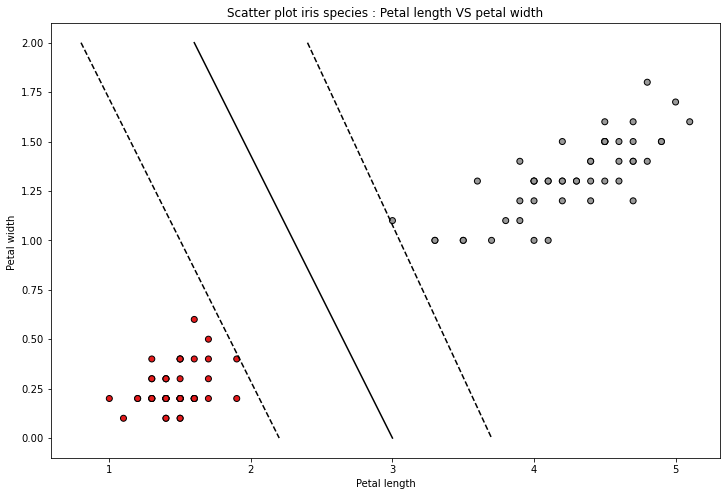

In [118]:
# SVM classification

binari_iris = iris[iris.species!=2]

plt.figure(figsize=(12, 8))

plt.scatter(binari_iris['petal length (cm)'] ,binari_iris['petal width (cm)'], c=binari_iris.species, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Petal length")
plt.ylabel("Petal width ")
plt.plot([0.8,2.2],[2.0,0], color = 'k',linestyle='--')
plt.plot([1.6,3],[2,0], color = 'k')
plt.plot([2.4,3.70],[2.0,0], color = 'k',linestyle='--')
plt.title('Scatter plot iris species : Petal length VS petal width')


In [ ]:
#Qu'est ce qu'il se passe si on rajoute une observation dans le dataset?
# Influence t-telle la zone de décision?

#Ici on cherche à maximiser l'écart entre les points dit edge

In [ ]:
#Remarque


⚠️Notez qu'il est important de toujours standardiser vos données lorsque vous utilisez des SVM.
   De manière générale quand vous utilisez des modèles avec calcul de distance, pensez à standardiser vos données.
   
   Pour cela vous avez plusieurs opérations mathématiques pour mettre vos données à la même échelle, voici les principaux à retenir :
   
   - **Min Max Scaling**
   - **Normalization** 
   - **Standardization**
   

Prenons le jeu de données suivant avec $x_1$ et $x_2$ des features associé à un label {0,1}.
On également rajouté la standardisation de nos 2 feature $x_1scaled$ et $x_2scaled$

Nous lançons un SVM linéaire pour tenter de classifier les labels 0 et 1 en fonction de ces features.
Un premier avec les features brutes et l'autre avec les features standardisés

Regardons maintenant sur le graphique N° comment la standardisation impact la frontière de décision.

| x1 | x2 | x1_scaled | x2_scaled | label |
|----|----|-----------|-----------|-------|
| 1  | 50 | -1.507    | -0.115    | 0     |
| 5  | 20 | 0.904     | -1.5010   | 0     |
| 3 | 80 | -0.301    | 1.270     | 1     |
| 5  | 60 | 0.904     | 0.346     | 1     |

(-2.0, 2.0, -2.0, 2.0)

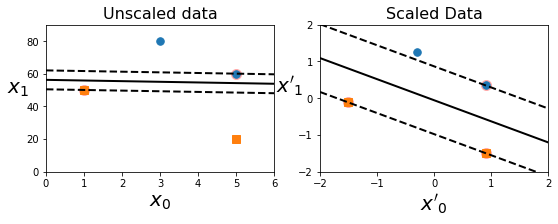

In [465]:
#Bad option
#Raw Data
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
#Fit SVM
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], 'o' ,marker='.',markersize = 15)
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], 'o' ,marker='s',markersize = 8)
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled data", fontsize=16)
plt.axis([0, 6, 0, 90])

#Scaled Data

X_scaled = (Xs-Xs.mean(axis=0))/Xs.std(axis=0)
svm_clf.fit(X_scaled, ys)

###################################################
# Plus simple avec sklearn :)
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(Xs)
###################################################

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], 'o' ,marker='.',markersize = 15)
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], 'o' ,marker='s',markersize = 8)
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled Data", fontsize=16)
plt.axis([-2, 2, -2, 2])


<style>
div.red { background-color:#ff000020; border-radius: 5px; padding: 20px;}
</style>
<div class = "red">

Les SVM sont sensibles à l'échelle des données. Il est important de standardiser ses données avant d'entrainer le modèle.

$$
  Xscale = \frac{X-\mu}{\sigma}\ 
$$

</div>

# SVM LINEAIRE

## HARDS MARGING VS SOFT MARGIN CLASSIFCATION

A ce stade tout se passe bien et la classification d'un SVM semble s'aplliquer parfaitement à notre jeu de données.

Cependant il est très rare qu'un jeu de données soit linéairement séparable... pour ainsi dire jamais avec des données d'entreprise.
Pour l'instant nous avons vu ce qu'on appelle un SVM à *hard margin classification*. Chaque individu doit être d'un coté de la zone de décision.

Autrement dit on ne peut pas trouver une versicolore du coté d'une setosa

**Mais celà pose 2 problèmes**



Prenons l'exemple du graphique N°.

Il est impossible de réaliser une classification linéaire à l'aide d'un SVM.
L'outliers empêche de trouver une frontière de décision qui permettrait de classifier parfaitement nos 2 groupes.

Dans le 2nd cas, visible sur le graphique N°
Ici l'outliers est tellement éloigné du point moyen de son groupe qu'il réduit drastiquement l'écart des marges du SVM.
<br>
La frontière de décision ne sera pas optimal et il sera compliqué de généraliser ce modèle à d'autres individus.


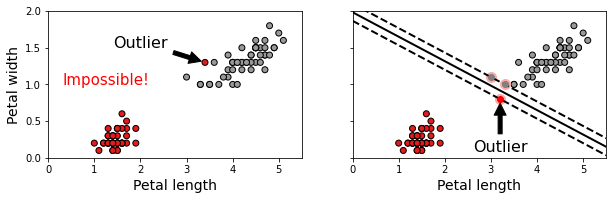

In [454]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
X = binari_iris[['petal length (cm)','petal width (cm)']]
y= binari_iris['species']


Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.scatter(Xo1[:, 0],Xo1[:, 1], c=yo1, cmap=plt.cm.Set1, edgecolor="k")
plt.text(0.3, 1.0, "Impossible!", fontsize=15, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.0, 1.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])


plt.sca(axes[1])
plt.scatter(Xo2[:, 0],Xo2[:, 1], c=yo2, cmap=plt.cm.Set1, edgecolor="k")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.plot([3.2],[0.8], 'o' ,marker='.',color='red' ,markersize = 12)
plt.plot([3.0],[1.1], 'o' ,marker='.',color='grey' ,markersize = 12)
plt.plot([3.3],[1.0], 'o' ,marker='.',color='grey' ,markersize = 12)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])


plt.show()

Pour éviter ce genre de problèmes, les statisticiens ont développés un modèle plus flexible.
Son objectif est de trouver un équilibre entre la maximisation des marges et le nombre de fois où l'on peut ignorer un point.
(nombre de points du mauvais coté, mal classifié)

Le modèle s'appelle le *soft margin classification* en opposition au *hard margin classification* vu plus haut.



#### Soft Margin

In [455]:
#Insérer meme enfin du code

La soft margin classification fait intervenir un nouveau paramètre dans le modèle. On l'appelle paramètre de régularisation $C$.
Il est à valeur dans $]0,\infty[$.
On parle ici d'hyperparamètre car sa valeur optimale n'est pas fixée mais dépend du jeu de données. C'est à vous de le trouver pour optimiser votre modèle

Regardons comment faire avec le code python suivant:

```python
#Import Package
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris virginica

# Code

#Standardiser nos données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Entrainement modèle
# Loss='hinge' permet de dire qu'on utile un SVM classique
# Vous pouvez regarder la doc pour avoir + d'infos
svm_clf= LinearSVC(loss='hinge', C=1)
svm_clf.fit(X_scaled, y)

#Prediction pour un nouveau point
svm_clf.predict([[1,1]])
#==> array([1.])

```

Plus on augmente la valeur de $C$ plus le modèle va avoir tendance à produire des marges proches de la frontière de décision et à l'inverse plus $C$ est petit plus la frontière sera grande.
<br>
Pour mieux le comprendre, regardons le graphique N° . Cela représente 3 SVM entrainés avec 3 valeurs différentes de $C$ à savoir 1, 50 et 100

In [525]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=50, loss="hinge", random_state=42)
svm_clf3 = LinearSVC(C=500, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf3 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf3),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)
scaled_svm_clf3.fit(X, y)

C:\Users\roulB\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=500, loss='hinge', random_state=42))])

In [526]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
b3 = svm_clf3.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
w3 = svm_clf3.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf3.intercept_ = np.array([b3])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])
svm_clf3.coef_ = np.array([w3])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
support_vectors_idx3 = (t * (X.dot(w3) + b3) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]
svm_clf3.support_vectors_ = X[support_vectors_idx3]

No handles with labels found to put in legend.


(4.0, 5.9, 0.8, 2.8)

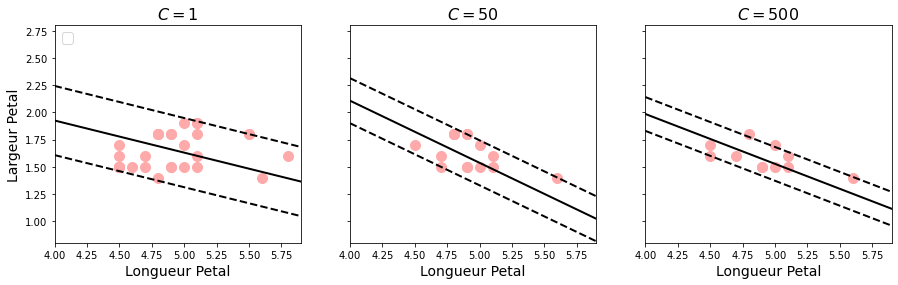

In [535]:
fig, axes = plt.subplots(ncols=3, figsize=(15,4), sharey=True)

plt.sca(axes[0])
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.scatter(X[:, 0],X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Longueur Petal", fontsize=14)
plt.ylabel("Largeur Petal", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.scatter(X[:, 0],X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Longueur Petal", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[2])
plot_svc_decision_boundary(svm_clf3, 4, 5.99)
plt.scatter(X[:, 0],X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Longueur Petal", fontsize=14)
plt.title("$C = {}$".format(svm_clf3.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])



Pour les autres hyperparamtres fixés, une augmentation de C permet de diminuer la taille des marges. 
Plus la taille de la marge sera faible plus il sera compliqué de généralisé pour le modèle
<br>
ℹ️ Le SVM linéaire est également disponible à travers la fonction **SGDClassifier** de sklearn. La différence essentiel provient de l'optimiseur utilisé. Ici la fonction utilise une descente de gradient qui peut s'avérer utile dans le cas de dataset avec beaucoup de ligne (n grand)

On l'utilise de la mêmme manière

```python

import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
Y = np.array([1, 1, 2, 2])
# Always scale the input. The most convenient way is to use a pipeline.
clf = make_pipeline(StandardScaler(),
                    SGDClassifier(max_iter=1000, loss='hinge', alpha=0.001))
#alpha=1/(n*C)
clf.fit(X, Y)
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

```

## Classification non liénaire

La classfication linéaire est très utile et peut s'avérer précise pour de nombreux dataset. Malheuresement quand on se confronte à des données réelles et non pas un dataset kaggle, les données sont rarement linéairement séparables.

Les modèles liénaires fournissent des performances assez faibles et ne permettent pas de répondre à votre problème.
Heuresement, il existe des technique pour faire évoluer les SVM et traiter les cas où les données ne sont pas linéairement séparable.

Prenons l'exemple intuitif suivant :

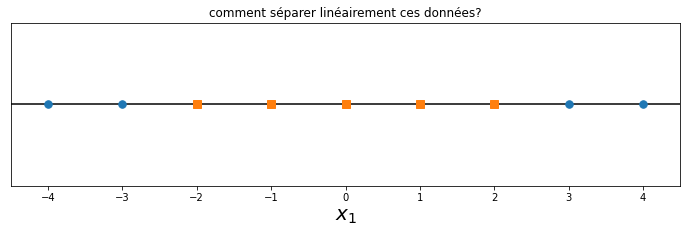

In [559]:
X1 = np.linspace(-4, 4, 9).reshape(-1, 1)
X2 = np.c_[X1, X1**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(12, 3))

plt.subplot(111)
#plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1[:, 0][y==0], np.zeros(4), 'o' ,marker='.',markersize = 15)
plt.plot(X1[:, 0][y==1], np.zeros(5), 'o' ,marker='s',markersize = 8)
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])
plt.title('comment séparer linéairement ces données?')
plt.show()

Ce problème est un cas récurrent en machine learning. Nous cherchons à classifier des données mais les features disponibles ne permettent pas de le faire.

C'est un cas d'école de **feature engineering**.
Ici il faut transformer nos données brutes de telle sorte qu'on puisse classifier nos données linéairement après transformation.

Une transformation possible est d'ajouter un feature qui serait $X_2 = X_1²$

Regardons graphiquement le résultat

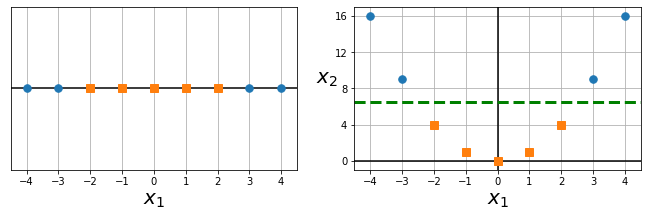

In [816]:
X1 = np.linspace(-4, 4, 9).reshape(-1, 1)
X2 = np.c_[X1, X1**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1[:, 0][y==0], np.zeros(4), 'o' ,marker='.',markersize = 15)
plt.plot(X1[:, 0][y==1], np.zeros(5), 'o' ,marker='s',markersize = 8)
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2[:, 0][y==0], X2[:, 1][y==0],  'o' ,marker='.',markersize = 15)
plt.plot(X2[:, 0][y==1], X2[:, 1][y==1], 'o' ,marker='s',markersize = 8)
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "g--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

En utilisant une transformation qui nous fait passer d'un problème à 1D à 2D, on trouve un espace où nos données sont linéairement séparable.
**Ce type de transformation est très utile pour les SVM mais s'applique à tous les modèles de machine learning.**


<style>
div.red { background-color:#ff000020; border-radius: 5px; padding: 20px;}
</style>
<div class = "blue">

Si vos données brutes offres des performances médiocres, pensez à faire du feature engineering sur vos données.
         
- Appliquer des fonctions sur vos données pour en créer des nouvelles (log, puissance, sigmoide, loi normale, ...)
- Combiner des données $X_{new} = X_1*X_2$
- Créer de nouveau feature avec des modèles (ACP, ACM, AUTOENCODER, KNN)
- Tester, soyez créatif ;)
</div>

Pour implémenter ce type d'approche sklearn offre des fonctions toutes faites.
Vous pouvez utiliser la fonction *PolynomiaFeatures* dans le module sklearn.preprocessing qui permet de faire des transformations polynomiales pour chaque features numériques.

```Python
#Import package
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
#Function sklearn qui genere données en forme de lune
X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
("poly_features", PolynomialFeatures(degree=3)),
("scaler", StandardScaler()),
("svm_clf", LinearSVC(C=10, loss="hinge"))
])
polynomial_svm_clf.fit(X, y

```

In [645]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

#Transformation polynomiale de nos features
poly = PolynomialFeatures(degree=3)
X_degr3 = poly.fit_transform(X)

#Standardiser les données
scaler = StandardScaler()
X_degr3_scaled = scaler.fit_transform(X_degr3)

#SVM classification

polynomial_svm_clf_test= LinearSVC(C=1, loss='hinge', random_state=42)
polynomial_svm_clf_test.fit(X_degr3_scaled,y)

LinearSVC(C=1, loss='hinge', random_state=42)

In [674]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

C:\Users\roulB\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

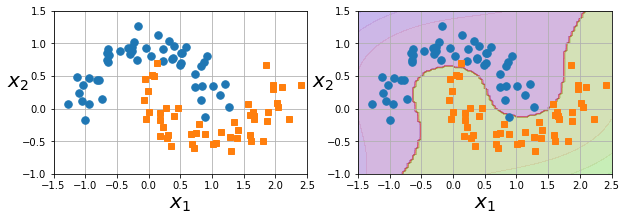

In [672]:
plt.figure(figsize=(10, 3))
plt.subplot(121)
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.subplot(122)
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

#### Polynomial Kernel

L'approche par transformation des features convient parfaitement pour des datasets de petite taille et peu complexe.
En effet, une tranformation polynomiale avec des degrés faibles ne pourra pas s'adapter à un dataset complexe et des degrés trop élevés créeront un dataset trop grand pour être entrainer dans un lapse de temps intéressant.

Rappel :

Plus on augmente la taille d'un dataset (features ou lignes) plus le modèle devient complexe à entrainer et plus le temps de calcul sera long...


Heuresement, les mathématiciens ont pensé à tout et il existe une astuce avec les SVM.
On l'appelle le *kernel trick*. Cela permet d'obtenir les mêmes résultats qu'en ajoutant des *polynomial features* sans faire exploser la taille du dataset.

Sans passer par la démonstration mathématique, il faut retenir qu'utiliser le *kernel trick* permet d'avoir un modèle de compléxité $O(n^d)$ vs $O(n)$.

Cette technique est implémentée directement dans sklearn avec la fonction suivante

```python
from sklearn.svm import SVC

svm = SVC(kernel="poly", degree=3, C=50,coef0=1)
svm.fit(X, y)

#Degree ==> Degre polinomiale
#Kernel ==> Le type de noyau
# C ==> Paramètre de tolérance (régularisation)
# coef0 ==> Contrôle l'infulence des polynomes
```

In [733]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

poly10_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=1, C=5))
    ])
poly10_kernel_svm_clf.fit(X, y)


poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

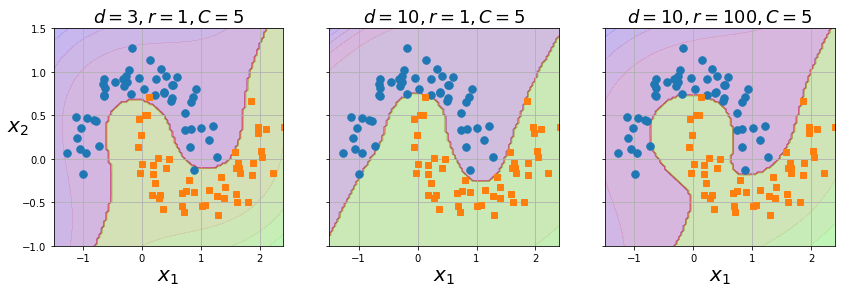

In [737]:
fig, axes = plt.subplots(ncols=3, figsize=(14, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[2])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")


plt.sca(axes[1])
plot_predictions(poly10_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=1, C=5$", fontsize=18)
plt.ylabel("")

plt.show()

La facon la plus simple de trouver les hyperpamratrès adéquats et de réaliser un *grid search*. Nous verrons en TD comment l'implémenter avec sklearn

### Similarity Features

Il existe de nombreux *kernel trick* utile pour trouver un espace à plus grande dimension où nos données sont liénairement séparables.
Vous pouvez aller voir celles qui sont implémentés avec sklearn sur https://scikit-learn.org/stable/modules/svm.html#kernel-functions.

La dernière que nous allons voir est une des plus populaires pour les SVM est la fonction de similarité *Gaussian Radial Basis Function*. Elle se définit formellement de la façon suivante

Equation N°

$\phi_\gamma(x,x') = exp(-\gamma\vert\vert x-x'\vert\vert²)$

où
$x'$ = Un point repère que nous choisisons 

Exemple :

Prenons le cas du graphique 1D N°...
Nous prenons $x'$ = {-2,1} comme repères et $x$ = -1 pour un $\gamma =0.3$

Nous obtenons donc les fonctions de similiratés suivantes pour 2 nouveaux features $x_2$ et $x_3$

$x_2 = exp(-0.3*1²) \simeq  0.74 $

$x_3 = exp(-0.3*2²) \simeq  0.3 $





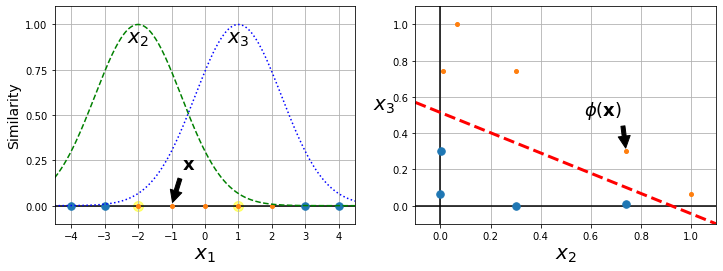

In [836]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=100, alpha=0.5, c="yellow")
plt.plot(X1[:, 0][yk==0], np.zeros(4),  'o' ,marker='.',markersize = 15)
plt.plot(X1[:, 0][yk==1], np.zeros(5),  's' ,marker='.',markersize = 8)
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0],  'o' ,marker='.',markersize = 15)
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], 's' ,marker='.',markersize = 8)
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)



plt.show()

Comme pour les *polynomials features*, vous pouvez créer à la main vous mêmes les features que vous souhaitez rajouter dans votre dataset avec cette technique.
Choissiez autant de 'repères' que vous avez de ligne dans votre dataset pour créer de nouveaux features.

Problème, cette technique peut rapidement faire exploser la taille de votre Dataset si n est grand. Vous obtiendrez à la fin un Dataframe de taille $n*n$ (en supposant que vous supprimez les features de bases)

Heuresement pour nous sklearn propose une implémentation optimisée dans ses fonction pour cette approche. Exactement comme pour les *polynomial features*.

On retrouve le *kernel trick* dans la fonction  SVC de sklearn avec comme noyau(kernel) 'rbf' pour Radial Basis Function kernel vu au dessus.


```python

from sklearn.svm import SVC

svm = SVC(kernel="rbf",  gamma=5, C=0.001)
svm.fit(X, y)

#gamma rend la distribution plus étroite ce qui donne des frontières de décisions plus irrégulières
#chaque observations influences plus la frontière de décision

# C ici ne change pas. Il est toujours un criètre de tolérance


```

Notez également que gamma comme C est un hyperparamètre permettant de régulariser le modèle.
Si votre modèle est en *overfitting* pensez à réduire gamma/C et inversement s'il est en *underfitting*

In [840]:

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

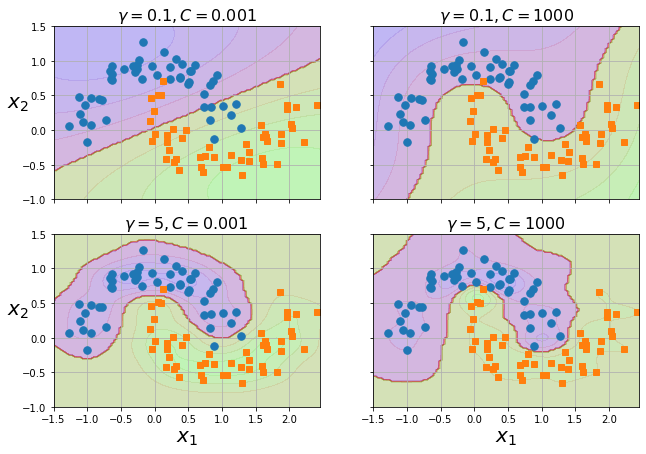

In [841]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

<style>
div.blue { background-color: rgba(117, 190, 218, 0.5); border-radius: 5px; padding: 20px;}
</style>
<div class = "blue">

Tips :
Parfois vos données ne sont pas au format numérique et le *kernel trick* nécessite un noyau spécifique.
Il faut savoir qu'il existe des noyaux adaptés pour différentes structures de données :
    
- String kernel pour la classification de text par exemple ( cf *string subsequence kernel* ou *Levenshtein distance*)
    
    
Comment choisir son *kernel trick* parmis ceux disponibles?
Il n'y a pas de règle écrite qui permet de choisir directement. La meilleur réponse est ca dépend de vos données.
    
Mais le schéma suivant marche généralement bien:
    
- 1, commencer par un SVM linéaire dispo avec la fonction LinearSVC
- 2, si le training set n'est très grand vous pouvez utiliser le noyau *Gaussian RBF kernel*
- 3, si vous avez du temps tester d'autres noyau mais 1 et 2 est généralement suffisant pour voir si les SVM sont adaptés au problème

⚠️ Pensez bien à tuner votre modèle avec un *gridsearch* et une *cross-validation* avant de comparer vos modèles avec votre test set
    

</div>

### Classification Multiclass pour les SVM


De nombreux modèles permettent nativement de réaliser des classifications multiclasse (Random Forest, SGBDclassifiers, Naives Bayes, ...).
Malheuresement les SVM n'en font pas partie.

Pour les utilier lors de classification multiclasse, nous devons trouver une parade!

Imaginons qu'on nous donne un dataset contenant des images. Chaque image représente un chiffre manuscrit entre 0 et 9.
On nous demande de créer un modèle basé sur un SVM afin de classifier ces chiffres manuscrit (l'humain qui le fait habituellement en à marre de le faire).

Le data scientist en charge du projet à bien compris la problématique mais sait aussi qu'un SVM ne permet pas de faire de la classification multiclasse...
Il cherche alors une stratégie pour répondre parfaitement à la commande.

Sa premiere intuition est de découper le problème en 10 problèmes distincts.
10 classification binaire où il va chercher à identifier les 1 VS les autres puis les 2 VS les autres etc.
Après les avoir entrainés, il obtiendra le score de décision grâce à sklearn et prendra celui qui le maximise.

Un collègue lui souffle également une autre idée.
Réaliser des modèles par pair. Un modèle 1vs2, 1vs3, 1vs4,...2vs3,, ... etc
Il essaye cette approche mais obtient 45 modèles différent pour ce problème.


C'est 2 approches sont appelés OVR(one versus rest) pour la premiere et OVO(one versus one) pour la seconde.
Elles permettent d'approcher un problème multiclasse avec une classification binaire.
Leur principal défaut est de faire exploser le nombre de modèle à entrainer

OVR produit N modèles ou N est le nombre de classe
<br>
OVO produit $N\times\frac{N-1}{2}$


L'implémentation avec sklearn est encore une fois chose facile
##### OVR

```python
#Import OVO, OVR
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
#Import SVM
from sklearn.svm import SVC

OvR_SVC_clf = OneVsRestClassifier(SVC())

OvR_SVC_clf.fit(trainX, trainY)

```

In [845]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [847]:
X, y = mnist["data"], mnist["target"]

In [860]:
X_train, X_test, y_train, y_test = X[:5000], X[60000:], y[:5000],y[60000:]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4', '3', '5', '3',
       '6', '1', '7', '2', '8', '6', '9', '4', '0', '9', '1', '1'],
      dtype=object)

In [861]:
#Import OVO, OVR
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
#Import SVM
from sklearn.svm import SVC

OvR_SVC_clf = OneVsRestClassifier(SVC())

OvR_SVC_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [874]:
some_digit = X[4000]
some_digit_image = some_digit.reshape(28, 28)



In [885]:
y[4000]

'7'

In [884]:
np.argmax(OvR_SVC_clf.decision_function(some_digit_image.reshape(1,784)))

7

## SVM pour la régression 

##Summary

**Advantages** of SVM
It works well on a dataset having many features.
It provides a clear margin of separation.
It is very effective for the dataset where the number of features are greater than the data points.
You can specify different kernel functions to make a proper decision boundary.

**Disadvantages** of SVM
It requires very high training time, hence not recommended for large datasets.
It is very sensitive to outliers.

In [282]:
!jupyter-nbconvert --to PDFviaHTML 01_svm.ipynb

[NbConvertApp] Converting notebook 01_svm.ipynb to PDFviaHTML
[NbConvertApp] Writing 852433 bytes to 01_svm.pdf
